<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/LAB1_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 1 - INTELIGENCIA DE NEGOCIOS**

Santiago Pardo - 202013025



Luis Plazas - 202013155




Felipe Rueda - 202010903

## DESCRIPCIÓN DEL PROBLEMA

### Contexto



En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.



AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones. El equipo ha dedicido utilizar técnicas de agrupación para resolver este reto



### Diccionario de los Datos (En Inglés)



| Atributo                         | Significado                                                                                                                   |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| CUST_ID                          | Credit card holder ID                                                                                                         |
| BALANCE                          | Monthly average balance (based on daily balance averages)                                                                     |
| BALANCE_FREQUENCY                | Ratio of last 12 months with balance. (1: Frequently updated, 0: Not frequently updated)                                      |
| PURCHASES                        | Total purchase amount spent during last 12 months                                                                             |
| ONEOFF_PURCHASES                 | Total amount of one-off purchases                                                                                             |
| INSTALLMENTS_PURCHASES           | Total amount of installment purchases                                                                                         |
| CASH_ADVANCE                     | Total cash-advance amount                                                                                                     |
| PURCHASES_FREQUENCY              | Frequency of purchases (Percent of months with at least one purchase). (1: Frequently purchased, 0: Not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY       | Frequency of one-off-purchases. (1: Frequently purchased, 0: Not frequently purchased)                                        |
| PURCHASES_INSTALLMENTS_FREQUENCY | Frequency of installment purchases. (1: Frequently purchased, 0: Not frequently purchased)                                    |
| CASHADVANCE_FREQUENCY            | Cash-Advance frequency                                                                                                        |
| CASH_ADVANCE_TRX                 | Average amount per cash-advance transaction                                                                                   |
| PURCHASES_TRX                    | Average amount per purchase transaction                                                                                       |
| CREDIT_LIMIT                     | Credit limit                                                                                                                  |
| PAYMENTS                         | Total payments (Due amount paid by the customer to decrease their statement balance) in the period                            |
| MINIMUM_PAYMENTS                 | Total minimum payments due in the period                                                                                      |
| PRC_FULL_PAYMEN                  | Percentage of months with full payment of the due statement balance                                                           |
| TENURE                           | Number of months as a customer                                                                                                |

## ENTENDIMIENTO DE LOS DATOS


### *Tablero de Control*

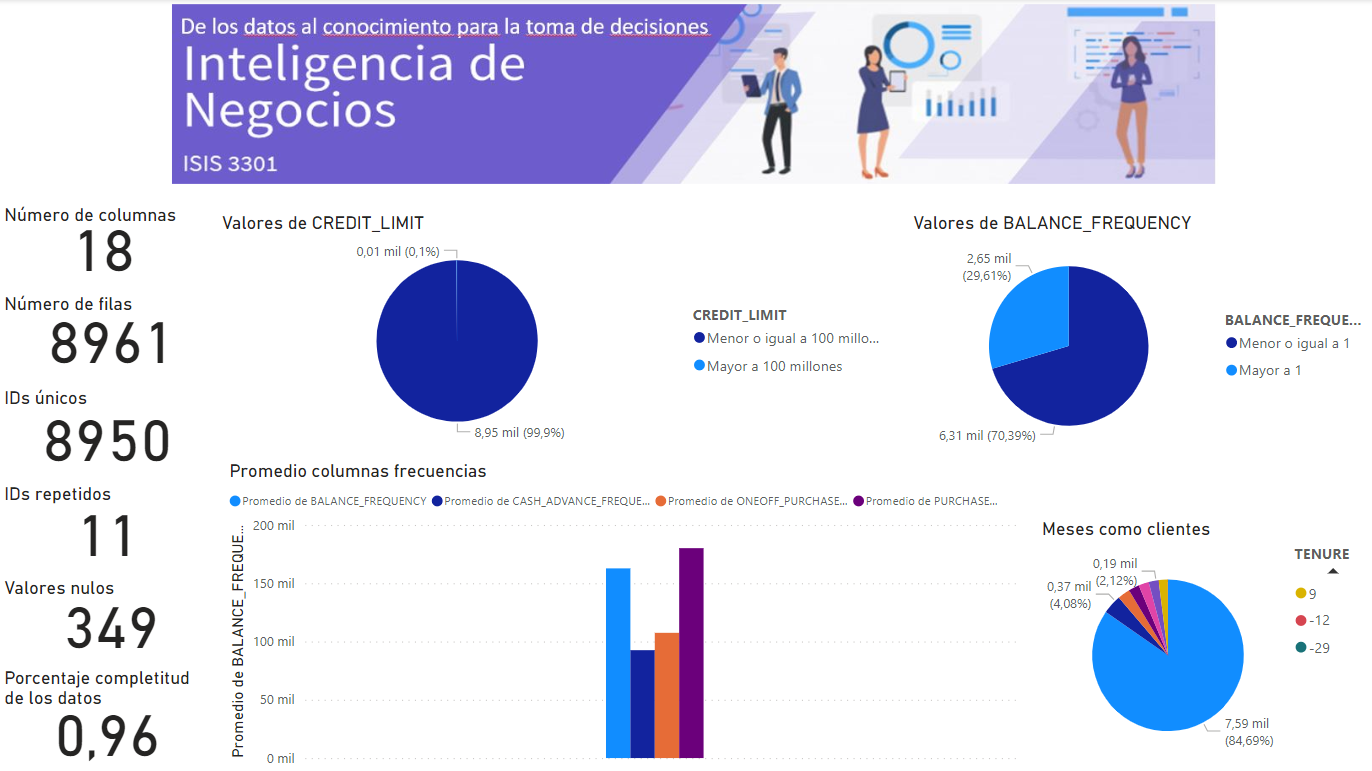


Hay datos inconsistentes en las columnas de TENURE, CREDIT_LIMIT y en las columnas de FREQUENCY. Por ejemplo en tenure se están mostrando la cantidad de meses que han sido clientes, por lo que no puede haber valores negativos. Por otro lado, hay valores de los límites de crédito que no se ajustan a la normalidad, ya que son bastante extremos. En las columnas de frecuencia deben haber valores que se encuentren entre 0 y 1, pero como se puede observar hay valores que se salen de este rango.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Lectura
#Luis
#df = pd.read_csv('/202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')
#Santiago
#df = pd.read_csv('202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')
#Felipe
df = pd.read_csv('202410_Laboratorio 1 - Agrupación_Customer_Data (1).csv',sep=',')


A continuación se muestran los diferentes tipos de datos que hay en la tabla, los valores no nulos que tienen y a que columnas corresponden.

In [39]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

También se pueden saber diferentes valores de las tablas, como sus valores máximos, minimos, su mediana y el conteo de los datos que hay en tales columnas

In [40]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# PERFILAMIENTO DE DATOS

En primer lugar, se hizo una visualización preliminar de los datos y cómo se visualizan en principio, y si a ojo propio, se puede ver alguna otra inconsistencia además de las mencionadas en la etapa de entendimiento de los datos.

In [41]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8957,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8958,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8959,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### *Eliminación de datos nulos*

Lo primero que se realizará en esta limpieza de datos es eliminar todos los datos nulos, ya que según el análisis realizado en el entendimiento de los datos, se encontraron 349 valores nulos, en comparación a los 8961 datos totales, la eliminación de dichos datos no generaría cambios significativos dentro de los modelos, teniendo en cuenta otros indicadores como el índice de completitud y nuevamente, la cantidad de valores nulos encontrados.

In [42]:
#Total de Datos sin Limpieza
df.shape[0]

8961

In [43]:
#Eliminación de datos nulos
df_clean_na = df.dropna()

In [44]:
#Total de Datos con Eliminación de Datos Nulos
df_clean_na.shape[0]

8619

In [45]:
#Datos Nulos Encontrados
df.shape[0] - df_clean_na.shape[0]

342

Por lo que de esta eliminación, se puede ver que se eliminaron 342 datos, lo cual es cercano al número de valores nulos encontrados en el entendimiento de los datos encontrado (349)

### *Atributos de Frecuencia*

De acuerdo al diccionario de los datos, varios de los valores de ciertos atributos deben estar dentro de un rango asociado entre 0 y 1, estos atributos son:

BALANCE_FREQUENCY



PURCHASES_FREQUENCY



ONE_OFF_PURCHASES_FREQUENCY



PURCHASES_INSTALLMENS_FREQUENCY



CASH_ADVANCE_FREQUENCY



De acuerdo con el entendimiento, existen valores que no cumplen dichas condiciones en los atributos ONE_OFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY, por lo cual, en esta etapa se eliminarán dichos datos inconsistentes de estos atributos

In [46]:
#Eliminación de Datos
#Columna ONEOFF_PURCHASES_FREQUENCY
df_oopf = df_clean_na[(df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] >= 0) & (df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_oopf.shape[0]

12

Se eliminaron 12 datos en los cuales no se cumplía el rango de frecuencia para el atributo ONE_OFF_PURCHASES_FREQUENCY

In [47]:
#Eliminación de Datos
#Columna CASH_ADVANCE_FREQUENCY
df_caf = df_clean_na[(df_clean_na['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_clean_na['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_caf.shape[0]

8

Se eliminaron 8 datos en los cuales no se cumplía el rango de frecuencia para el atributo CASH_ADVANCE_FREQUENCY

In [48]:
#Almacenar variables para futuras limpiezas
df_frequencies = df_oopf[(df_oopf['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_oopf['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_frequencies.shape[0]

20

En total, se eliminaron 20 datos que tenían inconsistencia del rango de frecuencia

### *Atributos de Cantidad de Meses*

Concretamente, para el atributo TENURE, se encontró que representaba la cantidad de meses (0-12), según el entendimiento de los datos, se encontraron valores menores a 0, por lo cual, en esta etapa se realizó la eliminación de dichos datos

In [49]:
#Eliminar datos con meses negativos
df_tenure = df_frequencies[(df_frequencies['TENURE'] >= 0) & (df_frequencies['TENURE'] <= 12)]
df_frequencies.shape[0] - df_tenure.shape[0]

4

En total, se eliminaron 4 datos que tenían inconsistencia con la cantidad de meses

### *Atributo ID (CUST_ID)*

Por lógica de la aplicación, cada id (perteneciente al atributo CUST_ID) debe ser único, por lo que una consistencia del sistema es encontrar un id duplicado, por lo cual, según el entendimiento de los datos, se encontraron 11 id's duplicados, por lo que en esta etapa, se tratará de eliminar dichos datos con el objetivo de mantener la coherencia y lógica de la aplicación.


Mediante el siguiente comando, se comprueba que en efecto, existen 11 datos, los cuales tienen id duplicados, por lo que el objetivo es que dichos datos en concreto, sean eliminados

In [50]:
df_tenure.shape[0] - df_tenure['CUST_ID'].unique().shape[0]

11

In [51]:
#Comando para Eliminar los Ids Duplicados
df_clean_id = df_tenure.drop_duplicates(subset='CUST_ID',keep='first')

In [52]:
#Comprobar que los datos fueron eliminados
df_tenure.shape[0] - df_clean_id.shape[0]

11

In [53]:
df_clean_id.shape

(8584, 18)

### *Atributo BALANCE*

Según el entendimiento de los datos, el atributo BALANCE presenta datos inconsistentes con el contexto, ya que contiene caracteres en medio de los números, por lo cual el objetivo de esta etapa es eliminar estos datos y delimitar el tipo de dato de este atributo a numérico únicamente (actualmente se encuentra como objeto)

In [54]:
df_balance = pd.to_numeric(df_clean_id['BALANCE'], errors='coerce')

In [55]:
df_clean_id['BALANCE'] = df_balance

<ipython-input-55-05ccd31c8032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_id['BALANCE'] = df_balance


Mediante este comando, comprobamos que a pesar de que no se eliminó ningún dato (estos datos problemáticos probablemente se eliminaron en etapas anteriores), el tipo de dato tuvo un cambio en el tipo, el cual es de float64, tal y como es el tipo de los otros datos numéricos del dataset

In [56]:
df_clean_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8584 non-null   object 
 1   BALANCE                           8578 non-null   float64
 2   BALANCE_FREQUENCY                 8584 non-null   float64
 3   PURCHASES                         8584 non-null   float64
 4   ONEOFF_PURCHASES                  8584 non-null   float64
 5   INSTALLMENTS_PURCHASES            8584 non-null   float64
 6   CASH_ADVANCE                      8584 non-null   float64
 7   PURCHASES_FREQUENCY               8584 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8584 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8584 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8584 non-null   float64
 11  CASH_ADVANCE_TRX                  8584 non-null   int64  
 12  PURCHA

In [57]:
df_clean_id.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.578000e+03,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000
mean,3.111737e+05,0.894875,1027.247112,605.455316,422.104777,990.006772,0.496727,0.205950,0.369535,0.136378,3.288677,15.064888,4516.726250,1783.696349,864.777647,0.159882,11.538211
std,2.052079e+07,0.207958,2170.836385,1687.225317,918.884602,2118.558840,0.401176,0.300150,0.398093,0.198908,6.835824,25.220373,3660.341075,2912.618835,2379.200223,0.296733,1.304482
min,-2.112921e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,1.461020e+02,0.909091,44.412500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1587.500000,417.889656,168.938095,0.000000,12.000000
50%,9.128947e+02,1.000000,377.825000,44.755000,95.935000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,897.748023,310.336181,0.000000,12.000000
75%,2.092024e+03,1.000000,1146.862500,600.000000,486.835000,1125.307197,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1949.049982,819.717133,0.166667,12.000000
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


No obstante, se encontró que este atributo BALANCE presenta una desviación estándar muy grande, lo cual implica que los datos tienen una variablidad muy alta, y por ende, no se tomarán en cuenta estos datos para el modelo debido a que serán "problemáticos" en cuanto a la detección de outliers y su importancia en el resultado de los modelos

### *Atributo PURCHASES*

Según el contexto y explicación del contexto de los datos, se encontró una correlación entre 3 atributos de este dataset, de la siguiente forma


*PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES*

Por lo que en los datos podrían existir valores en los cuales no se cumpla esta relación, por lo cual, el objetivo de esta etapa es reemplazar los valores de purchases para que se cumpla la relación, de modo que no se requiere eliminar ningún dato, sino únicamente cambiar el valor de un atributo en caso de que no sea necesario

In [58]:
df_clean_id['PURCHASES'] = df_clean_id['ONEOFF_PURCHASES'] + df_clean_id['INSTALLMENTS_PURCHASES']

<ipython-input-58-348d53cfbd2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_id['PURCHASES'] = df_clean_id['ONEOFF_PURCHASES'] + df_clean_id['INSTALLMENTS_PURCHASES']


In [59]:
df_clean_id.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.578000e+03,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000
mean,3.111737e+05,0.894875,1027.560093,605.455316,422.104777,990.006772,0.496727,0.205950,0.369535,0.136378,3.288677,15.064888,4516.726250,1783.696349,864.777647,0.159882,11.538211
std,2.052079e+07,0.207958,2170.938360,1687.225317,918.884602,2118.558840,0.401176,0.300150,0.398093,0.198908,6.835824,25.220373,3660.341075,2912.618835,2379.200223,0.296733,1.304482
min,-2.112921e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,1.461020e+02,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1587.500000,417.889656,168.938095,0.000000,12.000000
50%,9.128947e+02,1.000000,378.785000,44.755000,95.935000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,897.748023,310.336181,0.000000,12.000000
75%,2.092024e+03,1.000000,1146.862500,600.000000,486.835000,1125.307197,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1949.049982,819.717133,0.166667,12.000000
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observando el describe de las etapas anteriores, se puede observar que hubo cambios menores al no alterar directamente la media ni la desviación estándar, mientras que en los valores de los cuartiles hubo cambios poco significativo, por lo que en este dataset, la mayoría de los datos cumplían con esta relación.

### *Detección de Outliers*

Para este modelo también fue necesario hacer la detección de outliers, que se realizó mediante varios diagramas de cajas, que posteriormente permiten realizar este análisis mediante el método estadístico de rangos intercuartiles.

Como aclaración importante y tal y como se vio en etapas anteriores, se descartó el uso del atributo BALANCE dentro del modelo debido a que luego de eliminar los valores con caracteres de por medio, se encontró que los datos poseían una desviación estándar y variabilidad muy alta, por lo que son datos de los cuales no se puede concluir mucha información al respecto.

In [60]:
credit_limit_g = df_clean_id[['CREDIT_LIMIT']].melt()
purchases_g = df_clean_id[['PURCHASES']].melt()
purchases_trx_g = df_clean_id[['PURCHASES_TRX']].melt()
oneoff_purchases_g = df_clean_id[['ONEOFF_PURCHASES']].melt()
installment_purchases_g = df_clean_id[['INSTALLMENTS_PURCHASES']].melt()
cash_advance_g = df_clean_id[['CASH_ADVANCE']].melt()
cash_advance_trx_g = df_clean_id[['CASH_ADVANCE_TRX']].melt()
payments_g = df_clean_id[['PAYMENTS']].melt()
minimum_payments_g = df_clean_id[['MINIMUM_PAYMENTS']].melt()

Se realizó la gráfica por separado del atributo CREDIT_LIMIT, dado que la inconsistencia de los datos fue detectada en la etapa de entendimiento de los datos, por ende, es necesario eliminar varios datos con el objetivo de mejorar el rendimiento de los modelos y mantener la coherencia del contexto del problema.

Text(0.5, 1.0, 'Diagrama de Caja para Detección de Outliers')

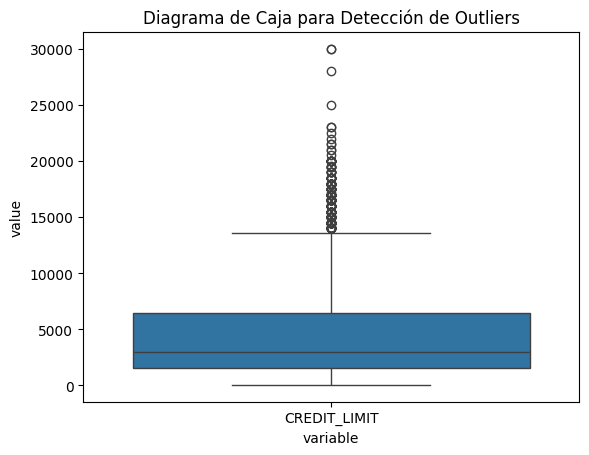

In [61]:
sns.boxplot(x="variable",y="value",data=credit_limit_g)
plt.title("Diagrama de Caja para Detección de Outliers")

Se hará los siguientes diagramas de caja de aquellos atributos, los cuales no pertenezcan a algún rango en específico (es decir, no se utilizan los atributos que contengan alguna frecuencia o porcentaje, porque se encuentran delimitados)

<Axes: xlabel='variable', ylabel='value'>

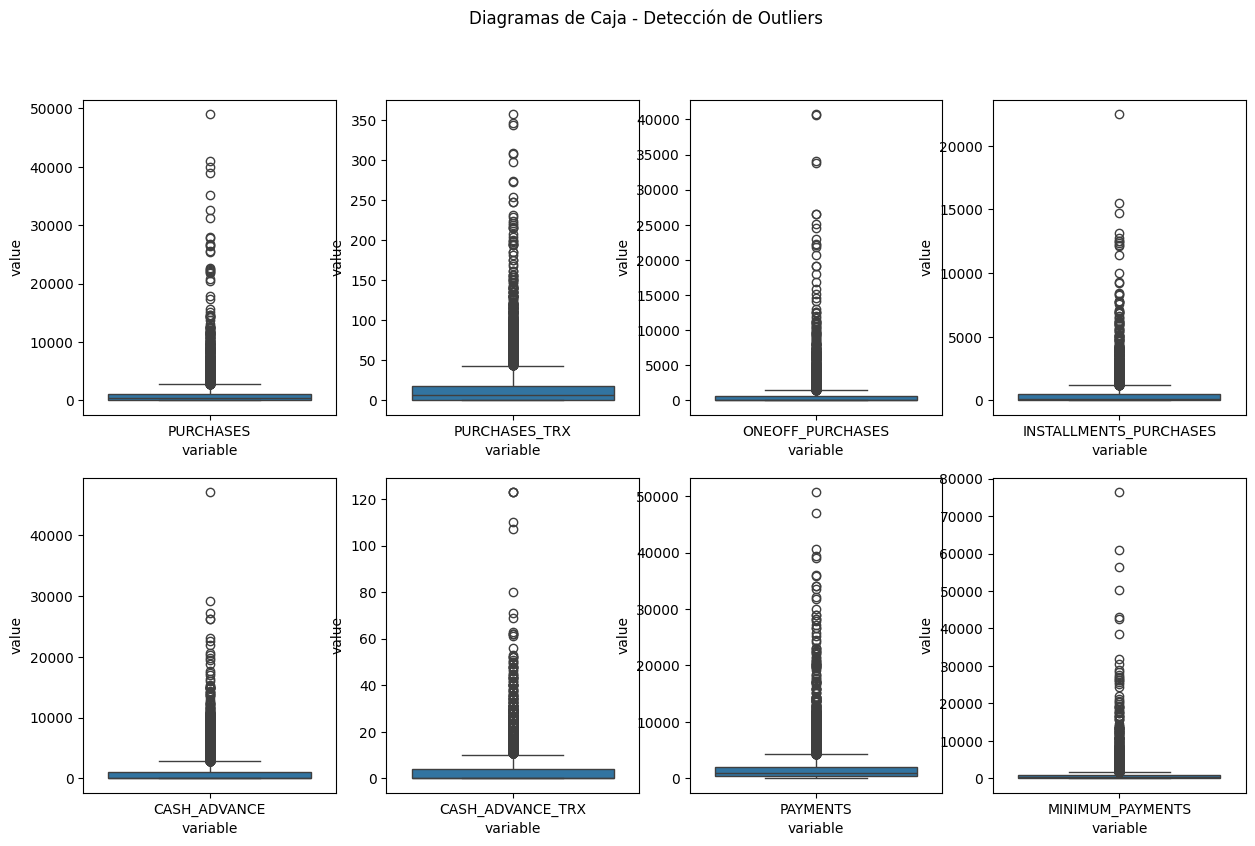

In [62]:
fig, axes = plt.subplots(2,4,figsize=(15,9))
fig.suptitle('Diagramas de Caja - Detección de Outliers')
sns.boxplot(x="variable",y="value",data=purchases_g,ax=axes[0][0])
sns.boxplot(x="variable",y="value",data=purchases_trx_g,ax=axes[0][1])
sns.boxplot(x="variable",y="value",data=oneoff_purchases_g,ax=axes[0][2])
sns.boxplot(x="variable",y="value",data=installment_purchases_g,ax=axes[0][3])
sns.boxplot(x="variable",y="value",data=cash_advance_g,ax=axes[1][0])
sns.boxplot(x="variable",y="value",data=cash_advance_trx_g,ax=axes[1][1])
sns.boxplot(x="variable",y="value",data=payments_g,ax=axes[1][2])
sns.boxplot(x="variable",y="value",data=minimum_payments_g,ax=axes[1][3])

Para este análisis, se escogió no eliminar aquellos outliers en los atributos mencionados en esta gráfica, ya que visualmente se puede observar que se perderían muchos datos si se eliminan dichos outliers y se realiza una intersección de los conjuntos de todos los outliers detectados en estos atributos. Por lo cual, únicamente se utilizó el atributo CREDIT_LIMIT para eliminar los outliers.

#### *Método de Rangos Intercuartiles*

En esta etapa, habiendo identificando los outliers del atributo CREDIT_LIMIT gráficamente, se utilizará el método de rangos intercuartiles para identificar dichos outliers y eliminarlos de los datos resultantes

In [63]:
q1_cl = df_clean_id['CREDIT_LIMIT'].quantile(0.25)
q3_cl = df_clean_id['CREDIT_LIMIT'].quantile(0.75)
iqr_cl = q3_cl - q1_cl

In [64]:
lower_limit = q1_cl - 1.5*iqr_cl
upper_limit = q3_cl + 1.5*iqr_cl

In [65]:
print(lower_limit, upper_limit)

-5781.25 13868.75


In [66]:
#Procedimiento para únicamente seleccionar valores dentro del límite establecido en los rangos intercuartiles
df_cl = df_clean_id[(df_clean_id['CREDIT_LIMIT'] >= lower_limit) & (df_clean_id['CREDIT_LIMIT'] <= upper_limit)]

In [67]:
df_clean_id.shape[0] - df_cl.shape[0]

243

In [68]:
df_cl.shape[0]

8341

En general, se eliminaron aproximadamente 243 outliers de este procedimiento, por lo cual, el total de datos que se utilizarán en el modelo será de 8341 datos

### *Limpieza Final de Datos*

Luego de haber eliminado los outliers correspondientes al atriibuto CREDIT_LIMIT, se eliminarán varios atributos que no so significativos dentro del modelo y tienen alta correlación con otros modelos. Estos atributos son CUST_ID y BALANCE por parte de que no son significativos y ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES por parte de que tienen una alta correlación con el atributo PURCHASES

In [69]:
df_clean = df_cl.drop(columns=['CUST_ID','BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'])

Por lo que el modelo recibirá como entrada 8341 datos con 14 atributos

In [70]:
df_clean.shape

(8341, 14)

A continuación, se hace un breve resumen de los datos luego del perfilamiento de los datos

In [71]:
df_clean.describe()

,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,0.894230,929.237160,948.057662,0.492284,0.199232,0.366321,0.135371,3.249371,14.377892,4165.475139,1633.667147,837.686817,0.156898,11.530032
std,0.208460,1708.818031,1942.597513,0.400694,0.294368,0.397378,0.197168,6.691232,23.539764,3040.588901,2380.668576,2368.833646,0.293387,1.315729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,0.909091,39.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,409.037304,168.173968,0.000000,12.000000
50%,1.000000,365.900000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,867.272423,304.823458,0.000000,12.000000
75%,1.000000,1093.930000,1105.738809,0.916667,0.272727,0.750000,0.250000,4.000000,17.000000,6000.000000,1868.475426,786.588160,0.166667,12.000000
max,1.000000,35131.160000,27296.485760,1.000000,1.000000,1.000000,1.000000,123.000000,347.000000,13600.000000,39461.965800,76406.207520,1.000000,12.000000


## MODELAMIENTO

Se van a utilizar 3 modelos de agrupación para estos datos

### *Modelo 1: K-Means Clustering*

### *Modelo 2: DBSCAN*

### *Modelo 3: Spectral Clustering*

## VALIDACIÓN